In [4]:
import os
import sys
from pathlib import Path
from glob import glob
from scipy.io import FortranFile
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/mnt/data2/dev/sunflower/')
sys.path.append('/mnt/data2/dev/sunflower/balltracking')
import balltrack as blt

In [ ]:
vpf = '../tests/vp000001.data'
vtf = '../tests/vt000001.data'
print(os.path.exists(vpf), os.path.exists(vtf))

In [ ]:
vp = np.fromfile(vpf).reshape([512, 1024])
vt = np.fromfile(vtf).reshape([512, 1024])
vm = np.sqrt(vp**2 + vt**2)

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(vm.ravel(), bins=200);

In [ ]:
%matplotlib widget
plt.figure(figsize=(12,7))
plt.imshow(vm, origin='lower', vmin=0, vmax=800, cmap='inferno')
plt.tight_layout()

In [ ]:
lanes = blt.make_lanes(vp, vt, 40, 4)
plt.figure(figsize=(12,7))
plt.imshow(lanes, origin='lower', vmin=0, vmax=10, cmap='gray_r')
plt.tight_layout()

In [7]:
vpfs = sorted(glob('../tests/vp*.data'))
vtfs = sorted(glob('../tests/vt*.data'))

In [8]:
lanes_list = []
for vpf, vtf in zip(vpfs, vtfs):
    print(vpf, vtf)
    vp = np.fromfile(vpf).reshape([512, 1024])
    vt = np.fromfile(vtf).reshape([512, 1024])
    lanes = blt.make_lanes(vp, vt, 40, 4)
    lanes_list.append(lanes)

../tests/vp000001.data ../tests/vt000001.data
../tests/vp000002.data ../tests/vt000002.data
../tests/vp000003.data ../tests/vt000003.data
../tests/vp000004.data ../tests/vt000004.data
../tests/vp000005.data ../tests/vt000005.data
../tests/vp000006.data ../tests/vt000006.data
../tests/vp000007.data ../tests/vt000007.data
../tests/vp000008.data ../tests/vt000008.data
../tests/vp000009.data ../tests/vt000009.data
../tests/vp000010.data ../tests/vt000010.data
../tests/vp000011.data ../tests/vt000011.data
../tests/vp000012.data ../tests/vt000012.data
../tests/vp000013.data ../tests/vt000013.data
../tests/vp000014.data ../tests/vt000014.data
../tests/vp000015.data ../tests/vt000015.data
../tests/vp000016.data ../tests/vt000016.data
../tests/vp000017.data ../tests/vt000017.data
../tests/vp000018.data ../tests/vt000018.data
../tests/vp000019.data ../tests/vt000019.data
../tests/vp000020.data ../tests/vt000020.data
../tests/vp000021.data ../tests/vt000021.data
../tests/vp000022.data ../tests/vt

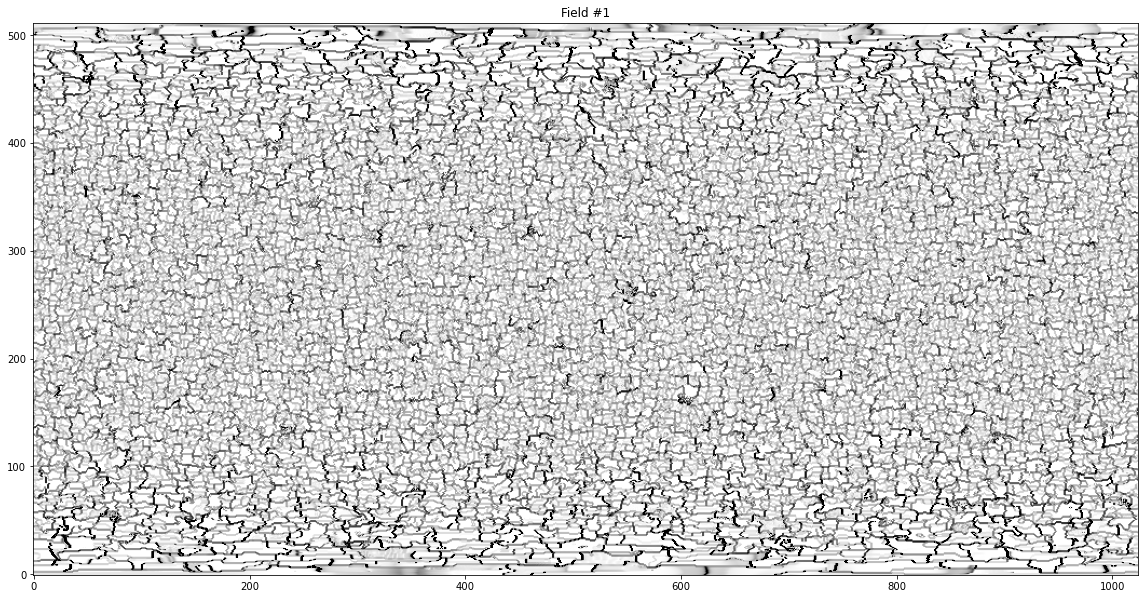

In [17]:
i = 0
lanes = lanes_list[i]
plt.figure(figsize=(16,10))
plt.imshow(lanes, origin='lower', vmin=0, vmax=10, cmap='gray_r')
plt.title(f'Field #{i+1}')
plt.tight_layout()
plt.savefig(f'/mnt/data2/ConFlow/sanity_check/lanes_{i+1:06d}.jpg')